<a href="https://colab.research.google.com/github/mavallejos93/BtaDevsOnly/blob/master/2Parcial_Modelo01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![](./img/logo.png)

# 2do Parcial: Análisis Exploratorio de Datos. 


### Nombre Estudiante:   
### Cédula de Ciudadanía:

# Modelo **01**

### Descripción de Valores:

    UNIQUE_ID: continuo.
    POSITION_TITLE: ASSISTANT DIRECTOR (EX LVL), LIBRARY ASSISTANT, DEPUTY ASSISTANT DIRECTOR (EXECUTIVE LEV',
                    POLICE OFFICER, ENGINEER/OPERATOR, ELECTRICIAN, FIRE FIGHTER,
                    SENIOR POLICE OFFICER, ENGINEER, CARPENTER, AIRPORT OPERATIONS COORDINATOR,
                    ASSOCIATE EMS PHYSICIAN DIRECTOR, FIELD SUPERVISOR, ....
    DEPARTMENT: Municipal Courts Department', Library, Planning & Development, Convention and Entertainment,
                Houston Police Department-HPD, Houston Fire Department (HFD), Mayor's Office, 
                General Services Department, Public Works & Engineering-PWE, Admn. & Regulatory Affairs,
                Houston Airport System (HAS), Health & Human Services, Dept of Neighborhoods (DON), 
                Finance, 'Fleet Management Department, Solid Waste Management, 'Legal Department',
                City Council, 'Human Resources Dept.', Parks & Recreation, Housing and Community Devp.,
                Houston Emergency Center (HEC), Houston Information Tech Svcs, City Controller's Office.
    BASE_SALARY: continuo.             
    RACE: Hispanic/Latino, White, Black or African American, Asian/Pacific Islander,
          American Indian or Alaskan Native, Others.
    EMPLOYMENT_TYPE: Full Time, Part Time 30, Part Time, Temporary, HFD Deferred Term.
    GENGER: Female, Male.
    EMPLOYMENT_STATUS: Active, Inactive.
    HIRE_DATE: Fecha (Año-Mes-Día).
    JOB_DATE: Fecha (Año-Mes-Día).
    

## 0.- Bibliotecas y Lectura

In [ ]:
import pandas as pd # pandas biblioteca para la lectura y manejo de conjunto de datos
import matplotlib.pyplot as plt # biblioteca para graficar
import numpy as np #biblioteca para calculos numericos

In [ ]:
#se cargan los datos desde el fichero employes.csv
dfEmpleados=pd.read_csv('/content/employee.csv', index_col='UNIQUE_ID')
dfEmpleados.head()

,POSITION_TITLE,DEPARTMENT,BASE_SALARY,RACE,EMPLOYMENT_TYPE,GENDER,EMPLOYMENT_STATUS,HIRE_DATE,JOB_DATE
UNIQUE_ID,,,,,,,,,
0,ASSISTANT DIRECTOR (EX LVL),Municipal Courts Department,121862.0,Hispanic/Latino,Full Time,Female,Active,2006-06-12,2012-10-13
1,LIBRARY ASSISTANT,Library,26125.0,Hispanic/Latino,Full Time,Female,Active,2000-07-19,2010-09-18
2,POLICE OFFICER,Houston Police Department-HPD,45279.0,White,Full Time,Male,Active,2015-02-03,2015-02-03
3,ENGINEER/OPERATOR,Houston Fire Department (HFD),63166.0,White,Full Time,Male,Active,1982-02-08,1991-05-25
4,ELECTRICIAN,General Services Department,56347.0,White,Full Time,Male,Active,1989-06-19,1994-10-22


In [ ]:
# SE QUIERE SABER CUANTOS REGISTROS Y CUANTOS DATOS TIENE EL DATA FRAME (#FILAS Y COLUMNAS)
dfEmpleados.shape


(2000, 9)

## 1.- Limpieza de los datos ( NaN)
    - Bonus: ¿Cuantas Filas se han eliminado después de la limpieza?

In [ ]:
#se revisa si existen datos desaparecidos ("no se encuentran"). La función info me representa la información completa de dataFrame
dfEmpleados.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   POSITION_TITLE     2000 non-null   object 
 1   DEPARTMENT         2000 non-null   object 
 2   BASE_SALARY        1886 non-null   float64
 3   RACE               1965 non-null   object 
 4   EMPLOYMENT_TYPE    2000 non-null   object 
 5   GENDER             2000 non-null   object 
 6   EMPLOYMENT_STATUS  2000 non-null   object 
 7   HIRE_DATE          2000 non-null   object 
 8   JOB_DATE           1997 non-null   object 
dtypes: float64(1), object(8)
memory usage: 156.2+ KB


In [ ]:
#se quiere saber la cuenta total de datos desaparecidos
dfEmpleados[dfEmpleados.isna().any(axis=1)].count()

POSITION_TITLE       147
DEPARTMENT           147
BASE_SALARY           33
RACE                 112
EMPLOYMENT_TYPE      147
GENDER               147
EMPLOYMENT_STATUS    147
HIRE_DATE            147
JOB_DATE             144
dtype: int64

In [ ]:
#se procede a eliminar los registros con datos desaparecidos (NaN) dado que es dificil (implosible) recrearlos
dfEmpleados=dfEmpleados.dropna(axis=0)
#se revisa la nueva dimension del dataFrame
dfEmpleados.shape

(1853, 9)

## 2.- ¿Cuál es el promedio de BASE_SALARY? 
    - Agregue una nueva columna 'SALARY' con valores '<= valor promedio', '> valor promedio'
      Ejemplo: si el promedio es 34540, entonces la columna ['SALARY'] tendra dos valores ['<= 34k', '>34k']
    - Elimine la columna BASE_SALARY

<img src="./img/grafi02.png">

In [ ]:
#se presenta la información estadistica del DF completa (todos los datos)
dfEmpleados.describe()

,BASE_SALARY
count,1853.000000
mean,56085.907717
std,21692.001274
min,24960.000000
25%,40186.000000
50%,54857.000000
75%,66614.000000
max,275000.000000


# La respuesta al promedio de BASE_SALARY es igual **56085.907717**

In [ ]:
print("El promedio BASE_SALARY es: ${} ".format(dfEmpleados['BASE_SALARY'].mean()))

El promedio BASE_SALARY es: $56085.90771721533 


In [ ]:
#Se crea la columna SALARY la cual presentara solo 2 datos: <=56K ó >56k
dfEmpleados['SALARY'] = dfEmpleados['BASE_SALARY'].apply(lambda x: '<=56k' if x <= 56085.90 else '>56k')
#se elimina la colmna BASE_SALARY
#dfEmpleados = dfEmpleados.drop(['BASE_SALARY'], axis = 1)
dfEmpleados.drop(['BASE_SALARY'], axis = 1, inplace = True)
dfEmpleados.head()

,POSITION_TITLE,DEPARTMENT,RACE,EMPLOYMENT_TYPE,GENDER,EMPLOYMENT_STATUS,HIRE_DATE,JOB_DATE,SALARY
UNIQUE_ID,,,,,,,,,
0,ASSISTANT DIRECTOR (EX LVL),Municipal Courts Department,Hispanic/Latino,Full Time,Female,Active,2006-06-12,2012-10-13,>56k
1,LIBRARY ASSISTANT,Library,Hispanic/Latino,Full Time,Female,Active,2000-07-19,2010-09-18,<=56k
2,POLICE OFFICER,Houston Police Department-HPD,White,Full Time,Male,Active,2015-02-03,2015-02-03,<=56k
3,ENGINEER/OPERATOR,Houston Fire Department (HFD),White,Full Time,Male,Active,1982-02-08,1991-05-25,>56k
4,ELECTRICIAN,General Services Department,White,Full Time,Male,Active,1989-06-19,1994-10-22,>56k


In [ ]:
#se quiere observar los ultimos 5 registros del dataframe
dfEmpleados.tail()

,POSITION_TITLE,DEPARTMENT,RACE,EMPLOYMENT_TYPE,GENDER,EMPLOYMENT_STATUS,HIRE_DATE,JOB_DATE,SALARY
UNIQUE_ID,,,,,,,,,
1995,POLICE OFFICER,Houston Police Department-HPD,White,Full Time,Male,Active,2014-06-09,2015-06-09,<=56k
1996,COMMUNICATIONS CAPTAIN,Houston Fire Department (HFD),Black or African American,Full Time,Male,Active,2003-09-02,2013-10-06,>56k
1997,POLICE OFFICER,Houston Police Department-HPD,White,Full Time,Male,Active,2014-10-13,2015-10-13,<=56k
1998,POLICE OFFICER,Houston Police Department-HPD,Asian/Pacific Islander,Full Time,Male,Active,2009-01-20,2011-07-02,<=56k
1999,FIRE FIGHTER,Houston Fire Department (HFD),Hispanic/Latino,Full Time,Male,Active,2009-01-12,2010-07-12,<=56k


## 3.- Añada una columna ['TOTAL_TIME_YEARS'] = ['JOB_DATE'] - ['HIRE_DATE']
        - Recuerde que son columnas formato FECHA (pd.to_datetime) 
        - Elimine las columnas ['JOB_DATE'], ['HIRE_DATE']

<img src="./img/grafi032.png">

In [ ]:
#Se revisa el formato de dato de las columnas ['JOB_DATE'], ['HIRE_DATE']
dfEmpleados.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1853 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   POSITION_TITLE     1853 non-null   object
 1   DEPARTMENT         1853 non-null   object
 2   RACE               1853 non-null   object
 3   EMPLOYMENT_TYPE    1853 non-null   object
 4   GENDER             1853 non-null   object
 5   EMPLOYMENT_STATUS  1853 non-null   object
 6   HIRE_DATE          1853 non-null   object
 7   JOB_DATE           1853 non-null   object
 8   SALARY             1853 non-null   object
dtypes: object(9)
memory usage: 144.8+ KB


In [ ]:
#se observa que las dos columnas son del tipo objeto, y para poder hacer operaciones 
#aritmeticas en el tiempo se deben pasar a formato de tiempo ambas columnas
dfEmpleados['HIRE_DATE'] = pd.to_datetime(dfEmpleados['HIRE_DATE'], dayfirst=True, errors='coerce')
dfEmpleados['JOB_DATE'] = pd.to_datetime(dfEmpleados['JOB_DATE'], dayfirst=True, errors='coerce')
#se revisa si ha pasado la variable de object a date
dfEmpleados.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1853 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   POSITION_TITLE     1853 non-null   object        
 1   DEPARTMENT         1853 non-null   object        
 2   RACE               1853 non-null   object        
 3   EMPLOYMENT_TYPE    1853 non-null   object        
 4   GENDER             1853 non-null   object        
 5   EMPLOYMENT_STATUS  1853 non-null   object        
 6   HIRE_DATE          1853 non-null   datetime64[ns]
 7   JOB_DATE           1853 non-null   datetime64[ns]
 8   SALARY             1853 non-null   object        
dtypes: datetime64[ns](2), object(7)
memory usage: 144.8+ KB


In [ ]:
#se crea la nueva columna ['TOTAL_TIME_YEARS'] que es el resultado de la sustracción de ['JOB_DATE'] - ['HIRE_DATE']
dfEmpleados['TOTAL_TIME_YEARS'] = dfEmpleados['JOB_DATE'].sub(dfEmpleados['HIRE_DATE'], axis = 0)
#se pasara la diferencia a años trabajados
dfEmpleados['TOTAL_TIME_YEARS'] = (dfEmpleados['TOTAL_TIME_YEARS']/np.timedelta64(1, 'D'))/365
#eliminamos las columnas ['JOB_DATE'] - ['HIRE_DATE']
dfEmpleados = dfEmpleados.drop(['JOB_DATE','HIRE_DATE'], axis='columns')
dfEmpleados.head()

,POSITION_TITLE,DEPARTMENT,RACE,EMPLOYMENT_TYPE,GENDER,EMPLOYMENT_STATUS,SALARY,TOTAL_TIME_YEARS
UNIQUE_ID,,,,,,,,
0,ASSISTANT DIRECTOR (EX LVL),Municipal Courts Department,Hispanic/Latino,Full Time,Female,Active,>56k,6.342466
1,LIBRARY ASSISTANT,Library,Hispanic/Latino,Full Time,Female,Active,<=56k,10.172603
2,POLICE OFFICER,Houston Police Department-HPD,White,Full Time,Male,Active,<=56k,0.000000
3,ENGINEER/OPERATOR,Houston Fire Department (HFD),White,Full Time,Male,Active,>56k,9.295890
4,ELECTRICIAN,General Services Department,White,Full Time,Male,Active,>56k,5.345205


## 4.- Elabore una gráfica que presente la cantidad de años trabajados del Empleado por raza y por Genero
      - ['TOTAL_TIME_YEARS'] ['RACE'] ['GENDER']

<img src="./img/grafi.png" style="width:450px">

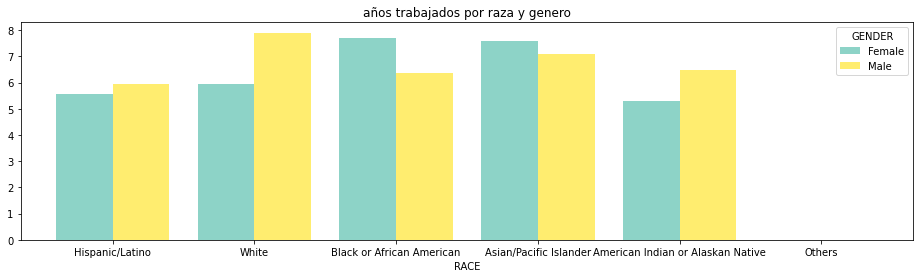

In [ ]:
dfGraica04 = dfEmpleados.groupby(['RACE', 'GENDER'], sort = False)['TOTAL_TIME_YEARS'].mean().unstack('GENDER')
dfGraica04.plot(kind = 'bar', figsize = (16, 4), rot = 0, title = "años trabajados por raza y genero", cmap = 'Set3', width = 0.8)

## 5.- ¿Cuántos hombres y mujeres ['GENDER'] están representados en el DataFrame?

In [ ]:
dfEmpleados['GENDER'].value_counts()

Male      1288
Female     565
Name: GENDER, dtype: int64

## 6.- ¿Cuál es el tiempo promedio ['TOTAL_TIME_YEARS']? 
        - ¿Tiempo Promedio de las mujeres?
        - ¿Tiempo Promedio de los hombres?

In [ ]:
dfEmpleados['TOTAL_TIME_YEARS'].describe()


count    1853.000000
mean        6.871864
std         7.500403
min        -9.142466
25%         0.857534
50%         4.002740
75%        12.498630
max        35.895890
Name: TOTAL_TIME_YEARS, dtype: float64

In [ ]:
dfEmpleados.loc[dfEmpleados['GENDER'] == 'Female', 'TOTAL_TIME_YEARS'].mean()


6.8176360771002535

In [ ]:
dfEmpleados.loc[dfEmpleados['GENDER'] == 'Male', 'TOTAL_TIME_YEARS'].mean()

6.895652173913034

## 7.-  ¿Cuál es la proporción de empleados Hispanic/Latinos ['RACE']?
    - Bonus--> ¿Cuál es la proporción de Mujeres en el total del grupo de Hipanic/Latino

## 8.- ¿Cuantos 'POLICE OFFICER' tienen salario por encima del promedio del salario?
    - Bonus--> ¿Cuantos 'POLICE OFFICER' son mujeres y cuantos hombres?

## 9.- Presente los 2 empleados con más tiempo ['TOTAL_TIME_YEARS'] en el dataframe.